In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv('Processed_data/clean_data.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282051 entries, 0 to 319563
Data columns (total 15 columns):
claim_id           282051 non-null float64
enrollee_id        282051 non-null float64
provider_id        282051 non-null float64
provider_status    282051 non-null float64
hmo_id             282051 non-null float64
care_id            282051 non-null float64
qty                282051 non-null float64
amount             282051 non-null float64
approved_qty       282051 non-null float64
approved_amount    282051 non-null float64
hmo_approved       282051 non-null float64
created_at         282051 non-null object
vetted_at          282051 non-null object
label              282051 non-null int64
unit_price         282051 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 34.4+ MB


In [3]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['vetted_at'] = pd.to_datetime(df['vetted_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282051 entries, 0 to 319563
Data columns (total 15 columns):
claim_id           282051 non-null float64
enrollee_id        282051 non-null float64
provider_id        282051 non-null float64
provider_status    282051 non-null float64
hmo_id             282051 non-null float64
care_id            282051 non-null float64
qty                282051 non-null float64
amount             282051 non-null float64
approved_qty       282051 non-null float64
approved_amount    282051 non-null float64
hmo_approved       282051 non-null float64
created_at         282051 non-null datetime64[ns]
vetted_at          282051 non-null datetime64[ns]
label              282051 non-null int64
unit_price         282051 non-null float64
dtypes: datetime64[ns](2), float64(12), int64(1)
memory usage: 34.4 MB


In [22]:
df['vetting_time'] = df['vetted_at'] - df['created_at']
df['vetting_time'].mean(),df['vetting_time'].min(),df['vetting_time'].max()

(Timedelta('40 days 17:02:33.730811'),
 Timedelta('0 days 00:01:03'),
 Timedelta('445 days 22:48:14'))

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

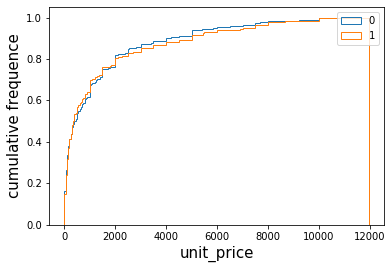

In [66]:
df.loc[df['label']==0]['unit_price'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['unit_price'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('unit_price',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

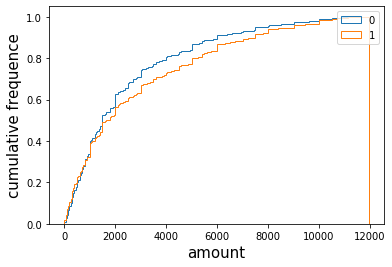

In [67]:
df.loc[df['label']==0]['amount'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['amount'].dropna().plot.hist(bins=range(0,12000,50),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('amount',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'cumulative frequence')

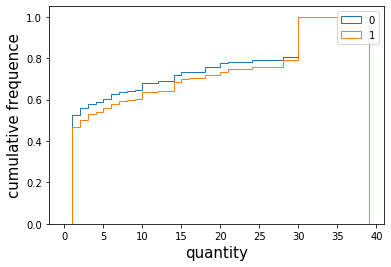

In [68]:
df.loc[df['label']==0]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='0',normed=True,cumulative=True)
df.loc[df['label']==1]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='1',normed=True,cumulative=True)
plt.legend(loc=1)
plt.xlabel('quantity',size=15)
plt.ylabel('cumulative frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'frequence')

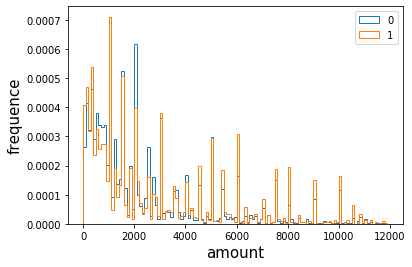

In [69]:
df.loc[df['label']==0]['amount'].dropna().plot.hist(bins=range(0,12000,100),histtype='step',label='0',normed=True)
df.loc[df['label']==1]['amount'].dropna().plot.hist(bins=range(0,12000,100),histtype='step',label='1',normed=True)
plt.legend(loc=1)
plt.xlabel('amount',size=15)
plt.ylabel('frequence',size=15)

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'frequence')

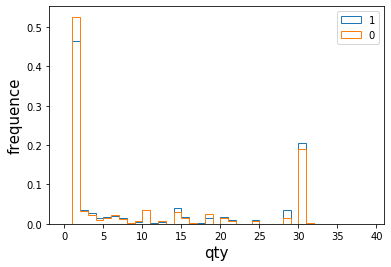

In [72]:
df.loc[df['label']==1]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='1',normed=True)
df.loc[df['label']==0]['qty'].dropna().plot.hist(bins=range(0,40,1),histtype='step',label='0',normed=True)
plt.legend(loc=1)
plt.xlabel('qty',size=15)
plt.ylabel('frequence',size=15)

In [3]:
from scipy.stats import expon
from numpy.random import seed
import pymc3 as pm

In [5]:
obs = df.dropna().loc[df.amount>0]['amount']
obs.min(),obs.max()

(0.1, 2850000.0)

In [4]:
alpha_est = np.mean(df.amount)**2 / np.var(df.amount)
beta_est = np.var(df.amount) / np.mean(df.amount)
rate_est = 1/beta_est
alpha_est,beta_est,rate_est

(0.052474744023711335, 79225.87060322592, 1.2622139616592386e-05)

In [8]:


with pm.Model() as model:
    
    alpha_ = pm.Exponential('alpha', alpha_est)
    beta_ = 1/pm.Exponential('rate',rate_est)
    
    y_obs = pm.Gamma('y_obs', alpha=alpha_, beta=beta_, observed=obs)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate, alpha]
Sampling 2 chains: 100%|██████████| 2000/2000 [22:43<00:00,  1.47draws/s]
The acceptance probability does not match the target. It is 0.990773898256215, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9689366289768452, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [9]:
alpha = np.mean(trace['alpha'])
rate = np.mean(trace['rate'])
beta = 1/rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c3f009150>,
      dtype=object)

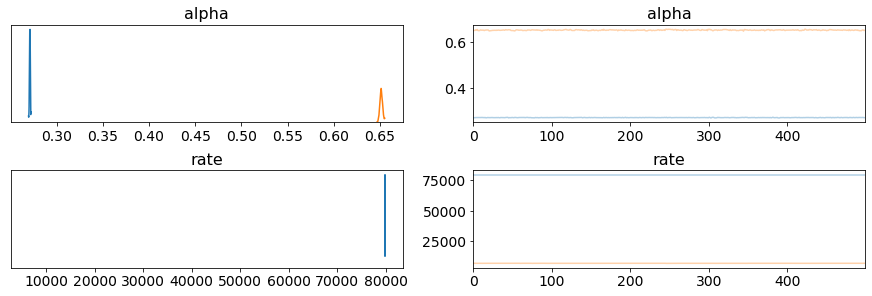

In [10]:
pm.traceplot(trace)


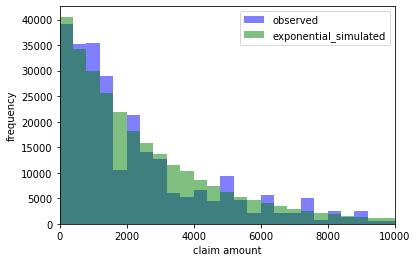

In [203]:
"""
# exponential simulation
# plot the distribution curve
skew=1.6
lam = 1/np.mean(df.amount)
yscale = 40000
x  = 1/lam*np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
y = yscale*expon.pdf(x*lam*skew)
plt.plot(x, y,'r-', lw=5, alpha=0.6, label='exponential_distribution')

#best_shot_simulated = expon(scale=1/(lam*skew)).rvs(df.amount.shape[0])
"""
# gamma simulation
seed(47)
best_shot_simulated = gamma(alpha, scale=beta).rvs(n_no_ins)
# plot distribution histogram

df.amount.dropna().plot.hist(bins=range(0,20000,400),label='observed',alpha=0.5,color='blue')
plt.hist(best_shot_simulated,bins=range(0,20000,400),label='exponential_simulated',alpha=0.5,color='green')
plt.xlabel('claim amount',size=10)
plt.ylabel('frequency',size=10)
plt.xlim(0,10000)
plt.legend()

(0, 10000)

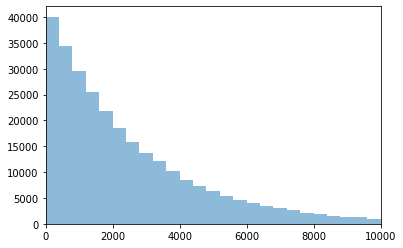

In [197]:

best_shot_simulated = expon(scale=1/(lam*skew)).rvs(df.amount.shape[0])
_ = plt.hist(best_shot_simulated,bins=range(0,20000,400),label='exponential_simulated',alpha=0.5)
plt.xlim(0,10000)

In [94]:
distribution

array([4160.79151251, 4164.14912474, 4159.01722676, ..., 4161.70344478,
       4158.67563315, 4158.11453519])

Text(0, 0.5, 'frequency')

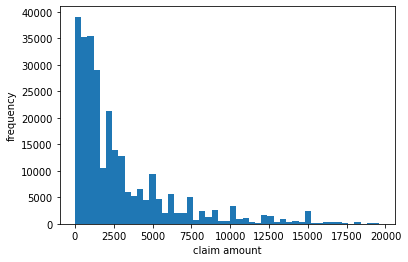

In [81]:
"""
alpha = pd.DataFrame({'v':trace['alpha']})
beta = pd.DataFrame({'v':trace['rate']})
seed(47)
simulated = gamma(alpha.mean(), scale=beta.mean()).rvs(n_no_ins)
plt.hist(simulated, bins=range(0,20000,400),label='simulated')

"""

df.amount.dropna().plot.hist(bins=range(0,20000,400),label='observed')
plt.xlabel('claim amount',size=10)
plt.ylabel('frequency',size=10)

In [4]:
df.head()

,claim_id,enrollee_id,provider_id,provider_status,hmo_id,care_id,qty,amount,approved_qty,approved_amount,hmo_approved,created_at,vetted_at,label,unit_price
0,10.0,89.0,1.0,1.0,1.0,586.0,6.0,1816.08,6.0,1816.08,1.0,2018-03-12 14:53:46,2018-05-21 10:05:30,0,302.68
1,11.0,89.0,1.0,1.0,1.0,586.0,6.0,1816.08,6.0,1816.08,1.0,2018-03-13 14:50:39,2018-05-21 10:07:19,0,302.68
2,13.0,74.0,1.0,1.0,1.0,434.0,5.0,115.00,5.0,115.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,23.00
3,13.0,74.0,1.0,1.0,1.0,1102.0,10.0,1265.00,10.0,1265.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,126.50
4,13.0,74.0,1.0,1.0,1.0,299.0,15.0,138.00,15.0,138.00,1.0,2018-03-16 10:28:53,2018-05-21 10:09:30,0,9.20


Text(0, 0.5, 'provider_id')

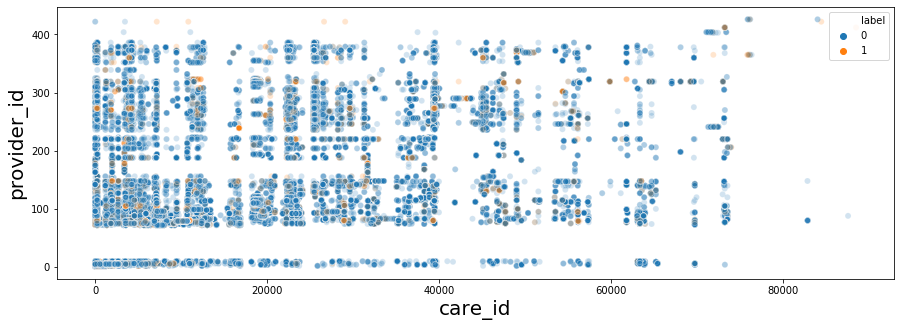

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='provider_id',hue = 'label', data=df, alpha=0.2, ax=ax)
plt.legend(loc=1)
plt.xlabel('care_id',size=20)
plt.ylabel('provider_id',size=20)
#plt.close(2)

Text(0, 0.5, 'enrollee_id')

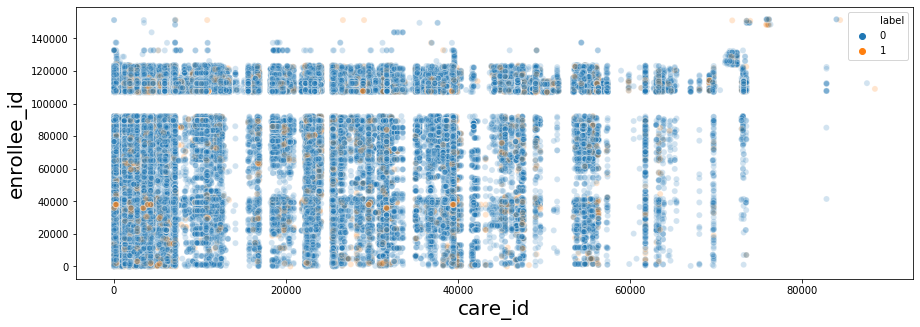

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='enrollee_id',hue = 'label', data=df, ax=ax,alpha=0.2)
plt.legend(loc=1)
plt.xlabel('care_id',size=20)
plt.ylabel('enrollee_id',size=20)

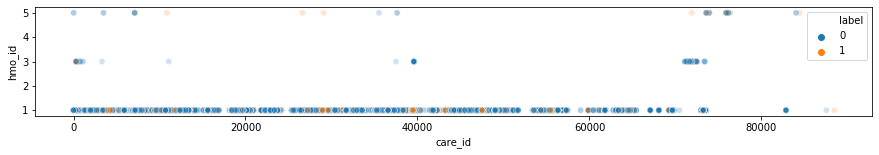

In [12]:
fig, ax = plt.subplots(figsize=(15,2))
sns.scatterplot(x='care_id',y='hmo_id',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.legend(loc=1)

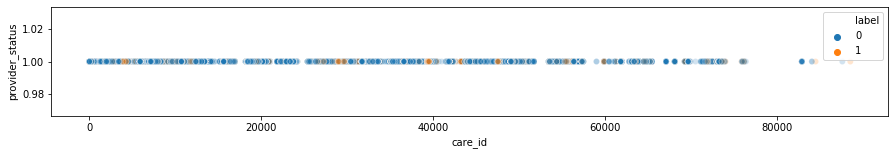

In [13]:
fig, ax = plt.subplots(figsize=(15,2))
sns.scatterplot(x='care_id',y='provider_status',hue = 'label', alpha=0.2, data=df, ax=ax)

Text(0, 0.5, 'amount')

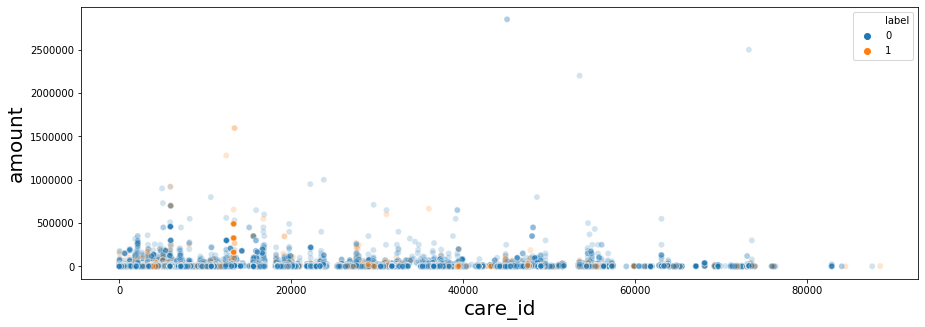

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='amount',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.xlabel('care_id',size=20)
plt.ylabel('amount',size=20)

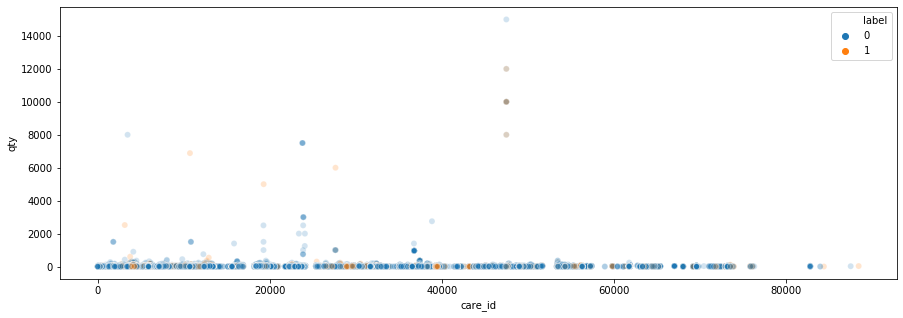

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x='care_id',y='qty',hue = 'label', alpha=0.2, data=df, ax=ax)
plt.xlabel('care_id',size=20)
plt.ylabel('qty',size=20)